# In this project, I analyzed a Netflix movie dataset to uncover key insights such as the most common genres, top-rated movies, and trends based on popularity and release years. 
# This analysis helps understand what works well on Netflix and how content is distributed over the years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Practice for VS\Netflix Movies Analysis\mymoviedb.csv', lineterminator='\n')

In [3]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.shape

(9827, 9)

In [5]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

The columns 'Overview', 'Poster URL', 'Original_Language' is of no use right now on the current analysis.
As I will be finding the answers to below questions and preprocess the data accordingly:
1. What is the most frequent genre of movies released on Netflix?
2. Which has highest votes in vote avg column?
3. What movie got the highest popularity? what's its genre?
4. What movie got the lowest popularity? what's its genre?
5. Which year has the most filmmed movies?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [31]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

# As per checking the info of the dataframe there are no null values in any columns.
if there is any null value or na in rows cell we can remove it through .dropna() function.
But we need to change the datatype of Release_Date to Datetime to avoid any errors in our analysis

In [30]:
#to check the duplicated values in the rows
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Insights from Basic Statistics:

# 1.Popularity is highly skewed:

The mean popularity is around 40, but the maximum value is over 5000. That means a few very popular movies are pulling the average up. 
The 75th percentile is only ~35, which shows that most movies are not very popular, and only a handful are extremely popular.

# 2.Many movies got few or no votes:

The minimum vote count is 0, which means some movies didn't receive any audience rating.
50% of the movies have fewer than 444 votes, and 75% have fewer than 1,376, indicating that audience engagement is low for the majority of titles.

# 3.Vote average stays in a tight range:

The average user rating is 6.44, with most movies falling between 5.9 and 7.1.
This suggests that audiences generally rate movies in the mid-range and rarely give extreme ratings (close to 0 or 10).

# 4.Outliers are present:
The large gap between the mean and max in both Popularity and Vote_Count tells us that outliers exist and should be handled carefully in deeper analysis (e.g., normalization or log-scaling might help).

In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = df['Release_Date'].dt.year
col_to_rem = ['Original_Language','Overview','Poster_Url']
df_new = df.drop(col_to_rem, axis=1)

In [15]:
df_new.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Label
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",Excellent
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",Excellent
2,2022,No Exit,2618.087,122,6.3,Thriller,Average
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",Excellent
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",Good


1. Release Date Transformation: Extracted the year from the Release_Date column.
2. Column Removal: Dropped unnecessary columns (Original_Language, Overview, Poster_Url) to simplify the dataset.
3. New DataFrame Creation: Stored the modified data in a new DataFrame to preserve the original dataset.

# Converting Vote_Average it into labeled categories can help make the data more intuitive and engaging, especially for visualizations. For example, rather than just showing a movie's score as a number, grouping it into categories like:

1. Excellent (8.0 – 10.0)

2. Good (6.5 – 7.9)

3. Average (5.0 – 6.4)

4. Poor (below 5.0)

In [18]:
def label_vote_average(vote):
    if vote >= 8.5:
        return "Popular"
    elif vote >= 7.1:
        return "Excellent"
    elif vote >= 6.5:
        return "Good"
    elif vote >= 5.9:
        return "Average"
    else:
        return "Poor"

df_new["Vote_Label"] = df_new["Vote_Average"].apply(label_vote_average)
#converting them to the 'category' type to save memory and improve performance.
df_new["Vote_Label"] = df_new['Vote_Label'].astype('category')

df_exploded = df_new.copy()
df_exploded['Genre'] = df_exploded['Genre'].str.split(', ')
df_exploded = df_exploded.explode('Genre').reset_index(drop=True)
#converting them to the 'category' type to save memory and improve performance.
df_exploded['Genre'] = df_exploded['Genre'].astype('category')

In [17]:
df_exploded.info()
df_exploded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  float64 
 5   Genre         25793 non-null  category
 6   Vote_Label    25793 non-null  category
dtypes: category(2), float64(2), int32(1), int64(1), object(1)
memory usage: 958.2+ KB


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Label
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,Excellent
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,Excellent
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,Excellent
3,2022,The Batman,3827.658,1151,8.1,Crime,Excellent
4,2022,The Batman,3827.658,1151,8.1,Mystery,Excellent


In [24]:
df_exploded.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Vote_Label      0
dtype: int64

In [27]:
df_exploded.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average      74
Genre             19
Vote_Label         5
dtype: int64

# Data Visualization

In [ ]:
sns.set_style('whitegrid')

# 1. What is the most frequent genre of movies released on Netflix?

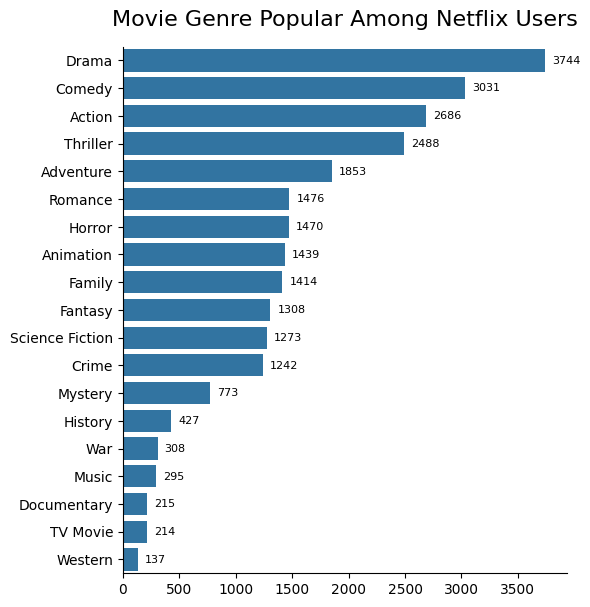

In [81]:
Plot1 = sns.catplot(y = 'Genre', data = df_exploded, kind = 'count',
            order = df_exploded['Genre'].value_counts().index, height=6)
Plot1.set(xlabel=None, ylabel=None)
Plot1.ax.set_title('Movie Genre Popular Among Netflix User', fontsize=16, pad = 15)
for bar in Plot1.ax.containers:
    Plot1.ax.bar_label(bar, label_type='edge', padding=5, fontsize=8)
plt.show()

In [93]:
most_frequent_genre = df_exploded['Genre'].value_counts().idxmax()
#print(f"The Most frequent genre released on Netflix is {most_frequent_genre} with {df_exploded['Genre'].value_counts().max()} movies.")
least_frequent_genre = df_exploded['Genre'].value_counts().idxmin()
#print(f"The least frequent genre released on Netflix is {least_frequent_genre} with {df_exploded['Genre'].value_counts().min()} movies.")

# The Most frequent genre released on Netflix is Drama with 3744 movies.
# The least frequent genre released on Netflix is Western with 137 movies.

# 2. Which has highest votes in vote avg column?

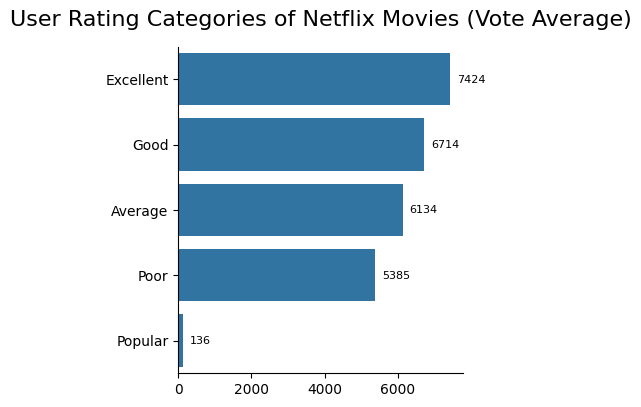

In [109]:
Plot2 = sns.catplot(y = 'Vote_Label', data = df_exploded, kind = 'count',
        order = df_exploded['Vote_Label'].value_counts().index, height=4)
Plot2.set(xlabel=None, ylabel=None)
Plot2.ax.set_title('User Rating Categories of Netflix Movies (Vote Average)', fontsize=16, pad = 15)
for bar in Plot2.ax.containers:
    Plot2.ax.bar_label(bar, label_type='edge', padding=5, fontsize=8)
plt.show()

In [107]:
most_voted_category = df_exploded['Vote_Label'].value_counts().idxmax()
print(f"The Most voted category for movies on Netflix is {most_frequent_genre} with {df_exploded['Genre'].value_counts().max()} movies.")

Excellent
